In [1]:
import os

In [2]:
os.chdir('..')

In [3]:
import speechbrain as sb
from speechbrain.processing.features import STFT, spectral_magnitude, Filterbank
import torchaudio
import torch
from loggers.wave_loggers import plot_waveform, plot_spectrogram, plot_filterbank
from loggers.statistics_loggers import print_stats

The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.
The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.


In [4]:
blue_exp_path = 'original_data/genres_original/blues/blues.00000.wav'
waveform, sample_rate = torchaudio.load(blue_exp_path)
print('waveform.shape: ', waveform.shape)
print('sample_rate: ', sample_rate)

waveform.shape:  torch.Size([1, 661794])
sample_rate:  22050


In [5]:
print_stats(waveform)

Shape: (1, 661794)
Dtype: torch.float32
 - Max:      0.885
 - Min:     -0.840
 - Mean:    -0.000
 - Std Dev:  0.141

tensor([[ 0.0073,  0.0166,  0.0076,  ..., -0.0556, -0.0611, -0.0642]])



In [6]:
# split the wave to get shorter fragments
# with a wave length as 30s, we will take two 10s fragments which are 5s-15s and 15s-25s

median = int(waveform.shape[1] / 2)
wave_fragment_1 = waveform[0, median - 10 * sample_rate: median].reshape((1, -1))
wave_fragment_2 = waveform[0, median: median + 10 * sample_rate].reshape((1, -1))

In [7]:
print_stats(wave_fragment_1)

Shape: (1, 220500)
Dtype: torch.float32
 - Max:      0.685
 - Min:     -0.777
 - Mean:    -0.000
 - Std Dev:  0.143

tensor([[-0.1590, -0.2235, -0.2465,  ...,  0.2624,  0.2145,  0.1559]])



In [8]:
print_stats(wave_fragment_2)

Shape: (1, 220500)
Dtype: torch.float32
 - Max:      0.885
 - Min:     -0.840
 - Mean:    -0.000
 - Std Dev:  0.146

tensor([[0.1103, 0.0906, 0.0856,  ..., 0.0229, 0.0228, 0.0251]])



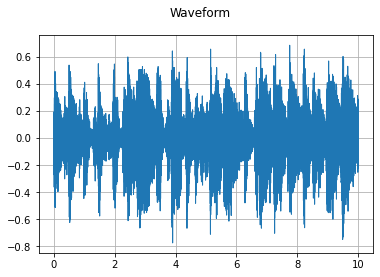

In [9]:
plot_waveform(wave_fragment_1, sample_rate)

In [10]:
compute_STFT = STFT(
     sample_rate=22050, win_length=15, hop_length=20, n_fft=400
 )
features = compute_STFT(wave_fragment_1)

In [11]:
print_stats(features)

Shape: (1, 501, 201, 2)
Dtype: torch.float32
 - Max:     34.382
 - Min:     -36.945
 - Mean:     0.000
 - Std Dev:  1.178

tensor([[[[ 6.7673e-02,  0.0000e+00],
          [ 1.0139e+00,  1.8169e+00],
          [-3.4289e+00, -1.5115e+00],
          ...,
          [-7.3405e-02, -6.3283e-03],
          [ 8.2880e-02, -4.0877e-03],
          [-6.9193e-02,  0.0000e+00]],

         [[ 9.5341e+00,  0.0000e+00],
          [-8.8098e+00,  7.6613e-01],
          [ 1.9280e+00, -1.2583e+00],
          ...,
          [-8.8927e-03, -8.5779e-03],
          [-1.5493e-02, -4.8642e-03],
          [-1.8463e-02,  0.0000e+00]],

         [[ 1.8323e+01,  0.0000e+00],
          [-2.0310e+01, -2.5129e+00],
          [ 1.7555e+01,  2.6650e+00],
          ...,
          [-4.8804e-03,  2.5681e-02],
          [-1.0003e-02,  1.5021e-02],
          [-1.1993e-02,  0.0000e+00]],

         ...,

         [[ 5.7149e+00,  0.0000e+00],
          [-5.4441e+00,  5.6752e+00],
          [ 4.5452e+00, -6.2300e+00],
          ...

In [12]:
sptr = spectral_magnitude(features)

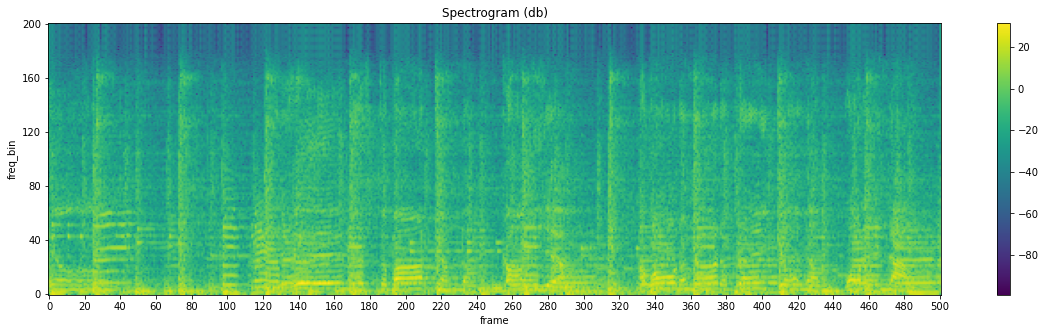

In [13]:
plot_spectrogram(sptr[0].T)

In [14]:
print_stats(sptr)

Shape: (1, 501, 201)
Dtype: torch.float32
 - Max:     1424.466
 - Min:      0.000
 - Mean:     2.773
 - Std Dev: 21.957

tensor([[[4.5797e-03, 4.3291e+00, 1.4042e+01,  ..., 5.4284e-03,
          6.8858e-03, 4.7877e-03],
         [9.0899e+01, 7.8200e+01, 5.3007e+00,  ..., 1.5266e-04,
          2.6371e-04, 3.4089e-04],
         [3.3572e+02, 4.1880e+02, 3.1527e+02,  ..., 6.8331e-04,
          3.2570e-04, 1.4384e-04],
         ...,
         [3.2661e+01, 6.1846e+01, 5.9472e+01,  ..., 6.3974e-06,
          2.0503e-05, 2.6883e-05],
         [1.6996e+01, 4.0006e+01, 3.8736e+01,  ..., 5.1130e-06,
          1.2188e-06, 3.3528e-08],
         [1.2606e-01, 2.4040e+00, 6.7352e+00,  ..., 3.9354e-03,
          3.6596e-03, 4.0375e-03]]])



In [15]:
compute_fbanks = Filterbank(n_mels=20, sample_rate=22050)
fbanks = compute_fbanks(sptr)

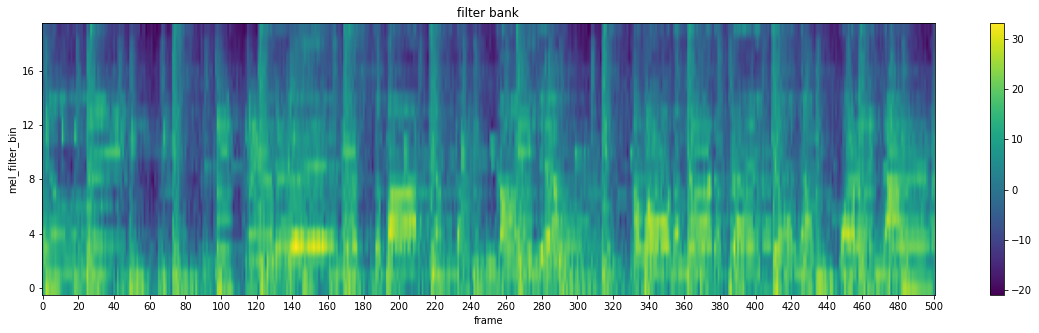

In [16]:
plot_filterbank(fbanks[0].T)

In [17]:
print_stats(fbanks)

Shape: (1, 501, 20)
Dtype: torch.float32
 - Max:     33.113
 - Min:     -20.937
 - Mean:     4.068
 - Std Dev: 10.018

tensor([[[ 11.9454,  12.5302,  12.1146,  ...,  -5.1765,  -4.0154,  -4.1931],
         [ 17.5069,  14.4472,  20.0307,  ...,  -1.2260,  -1.7406,  -3.6223],
         [ 27.1193,  22.0770,  17.5370,  ...,   2.7144,   1.1754,  -5.2868],
         ...,
         [ 19.3458,  13.9558,   4.8939,  ..., -17.3581, -12.9427, -18.6065],
         [ 17.4044,  10.9558,   5.4055,  ..., -10.0483, -10.1682, -13.6715],
         [  8.9726,  11.0729,   8.1804,  ...,  -5.1315,  -9.1288,  -7.8934]]])

